In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('Data.csv')

In [4]:
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\r\n\r\nCongratulations from me as well, use ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [6]:
#Lets upload the test data
test=pd.read_csv('Data_Test.csv')

In [7]:
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \r\n\r\n The title is fine as i...
2,00013b17ad220c46,""" \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:
#lets check the shape of train and test data
train.shape

(159571, 8)

In [9]:
test.shape

(153164, 2)

In [10]:
#Information of train and test data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id                  159571 non-null object
comment_text        159571 non-null object
malignant           159571 non-null int64
highly_malignant    159571 non-null int64
rude                159571 non-null int64
threat              159571 non-null int64
abuse               159571 non-null int64
loathe              159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [12]:
#lets describe the data of train and test set
train.describe

<bound method NDFrame.describe of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\r\nWhy the edits made under my use...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\r\n\r\nCongratulations from me as well, use ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7       00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8       00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9       00040093b2687caa  alignment on this subject and which are contra...   
10      0005300084f90edc  "\r\nFair use rationale for Image:Wonju.jpg\r\...   
11      00054a5e18

In [13]:
test.describe

<bound method NDFrame.describe of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \r\n\r\n The title is fine as i...
2       00013b17ad220c46  " \r\n\r\n == Sources == \r\n\r\n * Zawe Ashto...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
5       0001ea8717f6de06  Thank you for understanding. I think very high...
6       00024115d4cbde0f  Please do not add nonsense to Wikipedia. Such ...
7       000247e83dcc1211                   :Dear god this site is horrible.
8       00025358d4737918  " \r\n Only a fool can believe in such numbers...
9       00026d1092fe71cc  == Double Redirects == \r\n\r\n When fixing do...
10      0002eadc3b301559  I think its crap that the link to roggenbier i...
11      0002f87b16116a7f  "::: Somebody will invariabl

In [14]:
#Lets check the null values on train and test set 
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

There is no null value in train data set

In [15]:
#Lets check on the test set
test.isnull().sum()

id              0
comment_text    0
dtype: int64

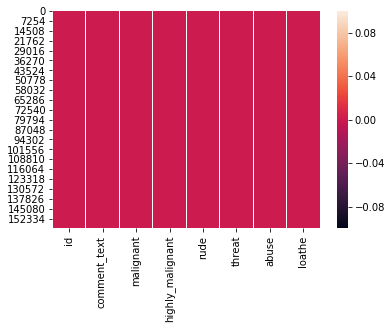

In [16]:
#Lets use heatmap 
sns.heatmap(train.isnull())

In [18]:
#Lets use correlation coefficient
train_cor=train.corr
train_cor

<bound method DataFrame.corr of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\r\nWhy the edits made under my use...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\r\n\r\nCongratulations from me as well, use ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7       00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8       00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9       00040093b2687caa  alignment on this subject and which are contra...   
10      0005300084f90edc  "\r\nFair use rationale for Image:Wonju.jpg\r\...   
11      00054a5e18b5

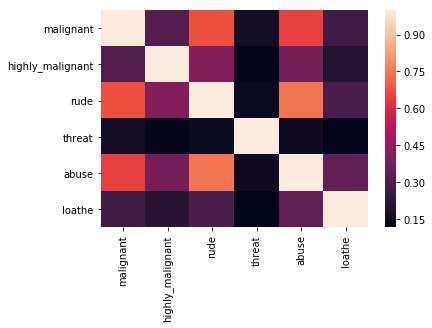

In [19]:
#lets use heatmap on correlation
sns.heatmap(train.corr())

In [20]:
#lets check the skewness
train.skew

<bound method DataFrame.skew of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\r\nWhy the edits made under my use...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\r\nMore\r\nI can't make any real suggestions...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5       00025465d4725e87  "\r\n\r\nCongratulations from me as well, use ...   
6       0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7       00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8       00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9       00040093b2687caa  alignment on this subject and which are contra...   
10      0005300084f90edc  "\r\nFair use rationale for Image:Wonju.jpg\r\...   
11      00054a5e18b5

malignant


0    144277
1     15294
Name: malignant, dtype: int64


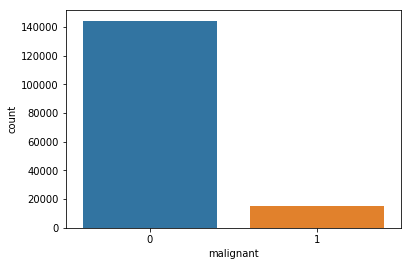

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


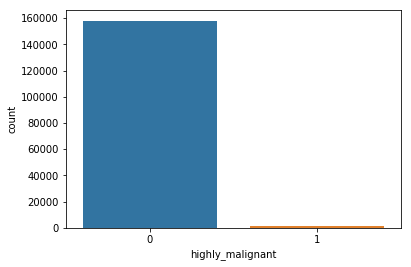

loathe


0    158166
1      1405
Name: loathe, dtype: int64


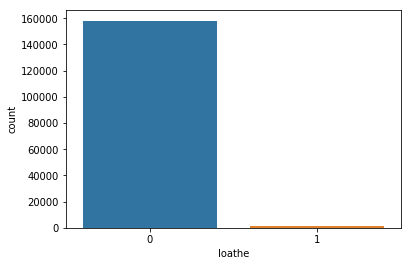

rude


0    151122
1      8449
Name: rude, dtype: int64


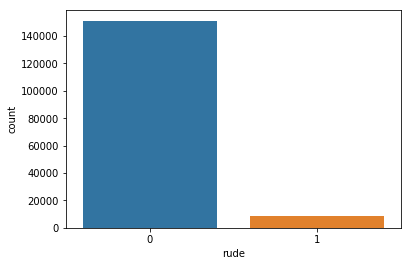

abuse


0    151694
1      7877
Name: abuse, dtype: int64


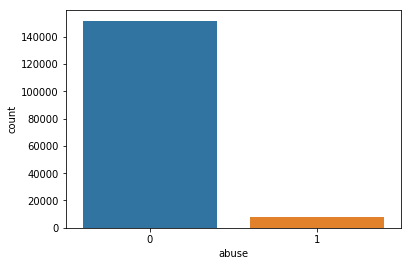

threat


0    159093
1       478
Name: threat, dtype: int64


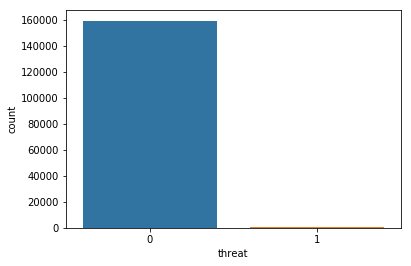

In [21]:
#Lets use countplot 
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print(i)
    print("\n")
    print(train[i].value_counts())
    sns.countplot(train[i])
    plt.show()

# Natural LanguageProcessing

In [22]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [23]:
train['length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0,265
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0,626
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [24]:
# Convert all messages to lower case
train['comment_text'] = train['comment_text'].str.lower()

In [25]:
# Replace email addresses with 'email'
train['comment_text'] = train['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

In [26]:
# Replace URLs with 'webaddress'
train['comment_text'] = train['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [27]:
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
train['comment_text'] = train['comment_text'].str.replace(r'£|\$', 'dollers')

In [28]:
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train['comment_text'] = train['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

In [29]:
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

In [30]:
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [31]:
import nltk
nltk.download('wordnet')
lem=WordNetLemmatizer()
train['comment_text'] = train['comment_text'].apply(lambda x: ' '.join(
lem.lemmatize(t) for t in x.split()))

[nltk_data] Downloading package wordnet to C:\Users\my
[nltk_data]     pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
train['clean_length'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,length,clean_length
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,265,181
1,000103f0d9cfb60f,d'aww! match background colour i'm seemingly s...,0,0,0,0,0,0,112,101
2,000113f07ec002fd,"hey man, i'm really trying edit war. guy const...",0,0,0,0,0,0,233,149
3,0001b41b1c6bb37e,can't make real suggestion improvement wondere...,0,0,0,0,0,0,626,397
4,0001d958c54c6e35,"you, sir, hero. chance remember page that's on?",0,0,0,0,0,0,67,47


In [34]:
# Total length removal
print ('Origian Length', train.length.sum())
print ('Clean Length', train.clean_length.sum())

Origian Length 63397311
Clean Length 43269436


In [35]:
cols_target = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_distribution = train[cols_target].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

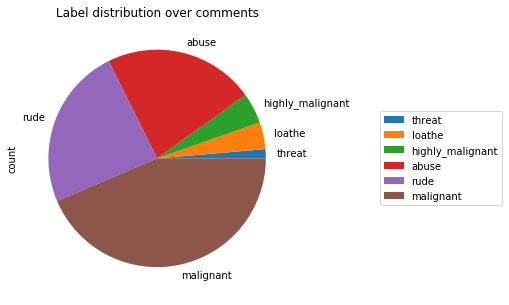

In [36]:
df_distribution.plot.pie(y='count',title='Label distribution over comments',
                                      figsize=(5, 5))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

In [37]:
target_data = train[cols_target]

train['bad'] =train[cols_target].sum(axis =1)
print(train['bad'].value_counts())
train['bad'] = train['bad'] > 0 
train['bad'] = train['bad'].astype(int)
print(train['bad'].value_counts())

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: bad, dtype: int64
0    143346
1     16225
Name: bad, dtype: int64


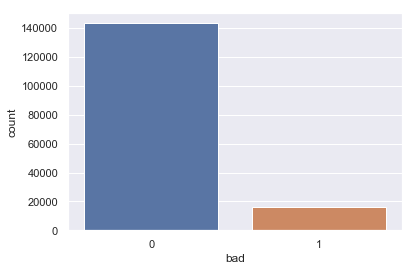

In [38]:
sns.set()
sns.countplot(x="bad" , data = train)
plt.show()

In [39]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(train['comment_text'])
x = features

In [40]:
train.shape

(159571, 11)

In [41]:
test.shape

(153164, 2)

In [42]:
y=train['bad']
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [43]:
y_train.shape,y_test.shape

((111699,), (47872,))

# Model Evaluation

# Logistic Regression

In [44]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
y_pred_train = LG.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9592744787330235
Test accuracy is 0.955276570855615
[[42734   216]
 [ 1925  2997]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     42950
           1       0.93      0.61      0.74      4922

   micro avg       0.96      0.96      0.96     47872
   macro avg       0.94      0.80      0.86     47872
weighted avg       0.95      0.96      0.95     47872



# Decision Tree

In [46]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [47]:
y_pred_train = DT.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9989346368364981
Test accuracy is 0.9397769050802139
[[41623  1327]
 [ 1556  3366]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     42950
           1       0.72      0.68      0.70      4922

   micro avg       0.94      0.94      0.94     47872
   macro avg       0.84      0.83      0.83     47872
weighted avg       0.94      0.94      0.94     47872



# Random Forest classifier

In [49]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
y_pred_train = RF.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9938853525993966
Test accuracy is 0.9515374331550802
[[42429   521]
 [ 1799  3123]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     42950
           1       0.86      0.63      0.73      4922

   micro avg       0.95      0.95      0.95     47872
   macro avg       0.91      0.81      0.85     47872
weighted avg       0.95      0.95      0.95     47872



In [51]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [52]:
y_pred_train = knn.predict(X_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(X_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9208945469520765
Test accuracy is 0.9164020721925134
[[42824   126]
 [ 3876  1046]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     42950
           1       0.89      0.21      0.34      4922

   micro avg       0.92      0.92      0.92     47872
   macro avg       0.90      0.60      0.65     47872
weighted avg       0.91      0.92      0.89     47872

